In [7]:
from testing import *

In [14]:
# from src import 
from src.models.qsar_OLS_pca import *

In [51]:
df = pd.read_csv("src/data/IC50_df.csv")
cdk = ["Cyclin-dependent kinase 2"]

model, X_train, X_test, y_train, y_test = create_model(df, cdk)

c:\Users\johan\OneDrive - Danmarks Tekniske Universitet\Skrivebord\ADA\ada-2024-project-forzada\src\models\helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGenerator
[18:01:49] DEPRECATION WARNING: please use MorganGener

R2 of the original model:  0.9648371838409143
R2 of the shuffled model:  0.12668038650920477
RMSE of the original model:  0.6596482090996411
RMSE of the shuffled model:  3.2874349622285433


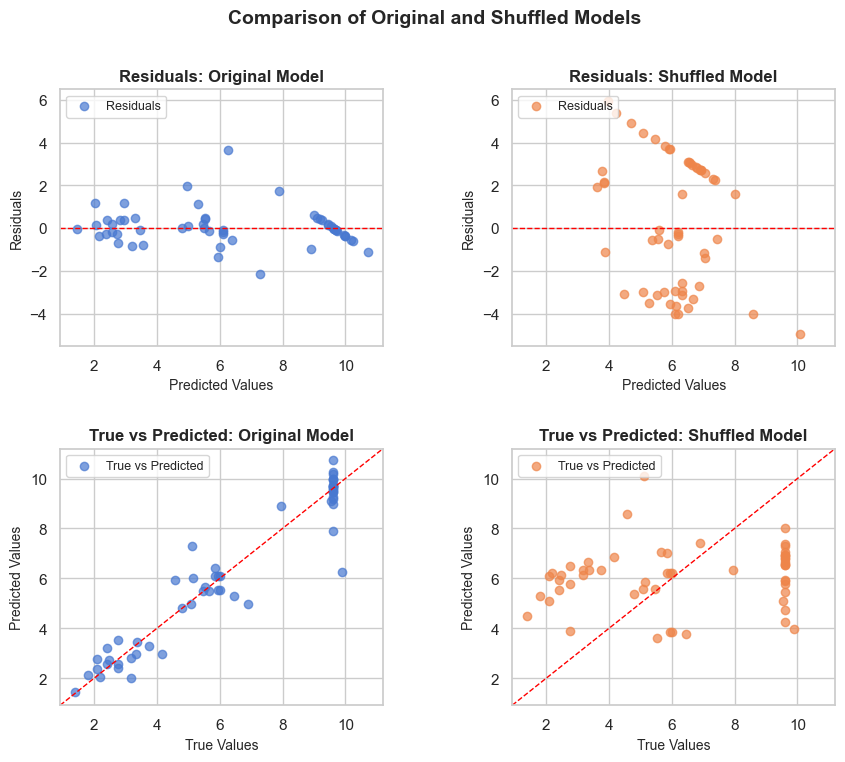

In [52]:
compare_cdkmodel_and_shuffled(model, y_train=y_train, X_train=X_train, y_test=y_test, X_test=X_test)

___________
Makes for models for all CDKs

In [26]:
# Choose top k CDKs which all contains at least 100 samples

list_cdks = df["Target Name"].unique()

In [28]:
len(list_cdks)

47

In [ ]:
# Count how many samples each CDK has
count = df["Target Name"].value_counts()

# Choose the CDKs which all contains at least 100 samples
top_k_cdks = count[count >= 100].index
print(top_k_cdks)
print(len(top_k_cdks))

Index(['Cyclin-dependent kinase 2/G1/S-specific cyclin-E1',
       'Cyclin-dependent kinase 4/G1/S-specific cyclin-D1',
       'Cyclin-A2/Cyclin-dependent kinase 2', 'Cyclin-dependent kinase 2',
       'Cyclin-dependent kinase 4', 'Cyclin-dependent kinase 9',
       'Cyclin-dependent kinase/G2/mitotic-specific cyclin- 1',
       'Cyclin-dependent kinase 1',
       'Cyclin-dependent kinase 1/G2/mitotic-specific cyclin-B',
       'Cyclin-T1/Cyclin-dependent kinase 9', 'Cyclin-dependent kinase 6',
       'Cyclin-dependent kinase 5 activator 1 [99-307]',
       'Cyclin-dependent kinase 4/G1/S-specific cyclin-D1 [L188C]',
       'Cyclin-A2 [171-432]/Cyclin-dependent kinase 2'],
      dtype='object', name='Target Name')
14


In [ ]:
# print status 
from tqdm import tqdm

models = []
r2 = []
rmse = []
counter = 0
for cdk in top_k_cdks:
    model , _, _, _, _ = create_model(df, [cdk])
    models.append(model)
    r2.append((cdk, model.rsquared))
    rmse.append((cdk, model.mse_resid**0.5))
    counter += 1


In [ ]:
# print status 
from tqdm import tqdm

models = []
r2 = []
rmse = []

# Wrap the `top_k_cdks` iterable with tqdm for the progress bar
for cdk in tqdm(top_k_cdks, desc="Processing CDKs"):
    model, _, _, _, _ = create_model(df, [cdk])
    models.append(model)
    r2.append((cdk, model.rsquared))
    rmse.append((cdk, model.mse_resid**0.5))

In [42]:
r2[0][1]

0.8041482518828739

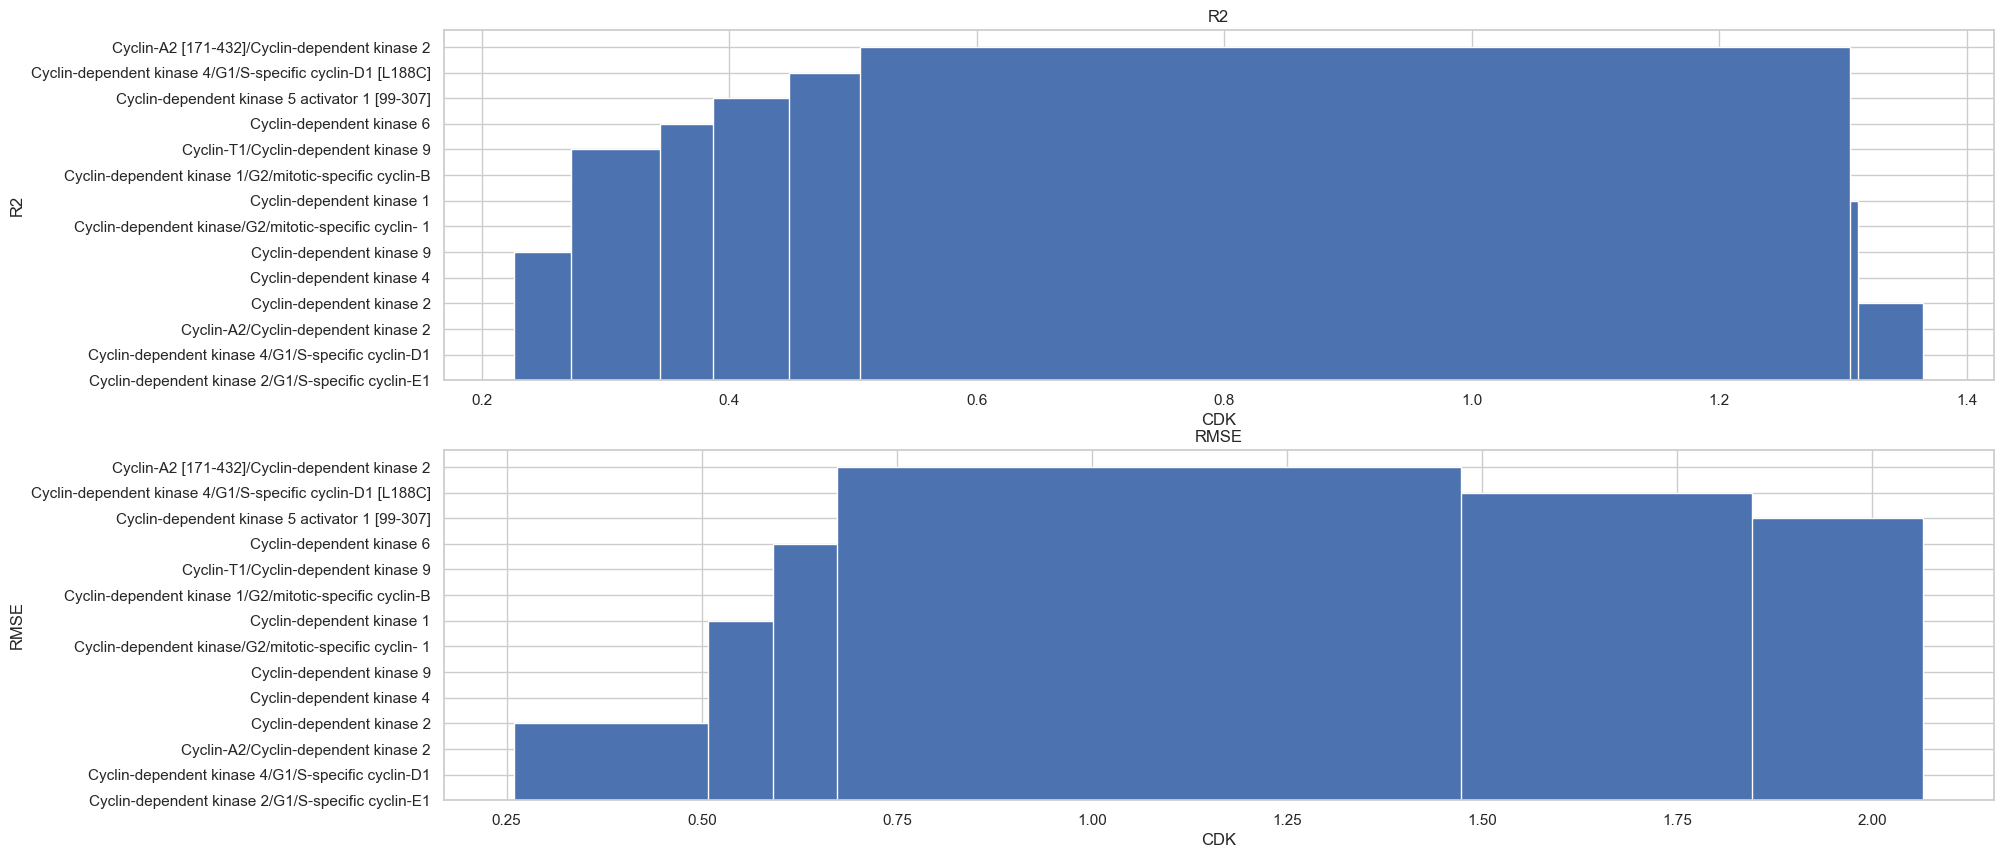

In [ ]:
# vertical bar plot of R2 and RMSE
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].bar([r for cdk, r in r2], [cdk for cdk, r in r2])
ax[0].set_title("R2")
ax[0].set_ylabel("R2")
ax[0].set_xlabel("CDK")


ax[1].verbar([r for cdk, r in rmse], [cdk for cdk, r in rmse])
ax[1].set_title("RMSE")
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("CDK")
plt.show()

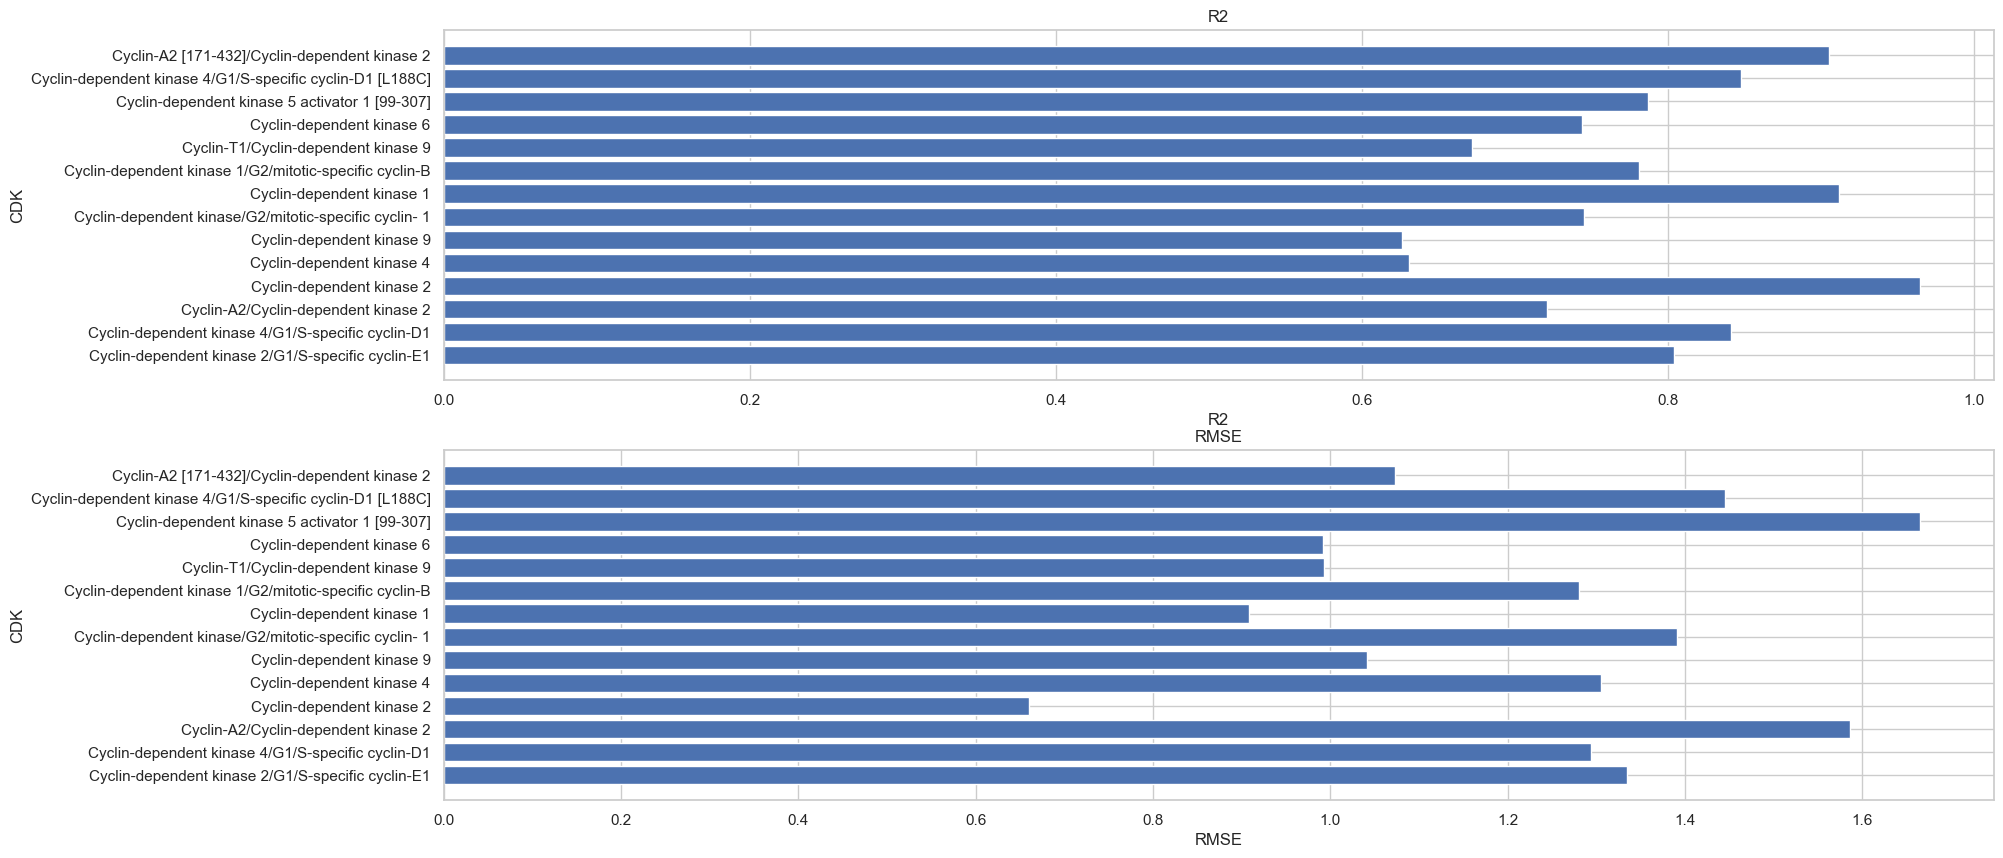

In [46]:
# horizontal bar plot of R2 and RMSE
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].barh([cdk for cdk, r in r2], [r for cdk, r in r2])
ax[0].set_title("R2")
ax[0].set_xlabel("R2")
ax[0].set_ylabel("CDK")

ax[1].barh([cdk for cdk, r in rmse], [r for cdk, r in rmse])
ax[1].set_title("RMSE")
ax[1].set_xlabel("RMSE")
ax[1].set_ylabel("CDK")
plt.show()

In [49]:
# Create a DataFrame for the R2 and RMSE values
df_r2 = pd.DataFrame(r2, columns=["CDK", "R2"])
df_rmse = pd.DataFrame(rmse, columns=["CDK", "RMSE"])

# Merge the two DataFrames on the CDK column
df_combined = pd.merge(df_r2, df_rmse, on="CDK")

# Sort descending by R2
df_combined = df_combined.sort_values(by="R2", ascending=False)

c:\Users\johan\anaconda3\envs\ada_course_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\johan\anaconda3\envs\ada_course_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\johan\anaconda3\envs\ada_course_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\johan\anaconda3\envs\ada_course_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

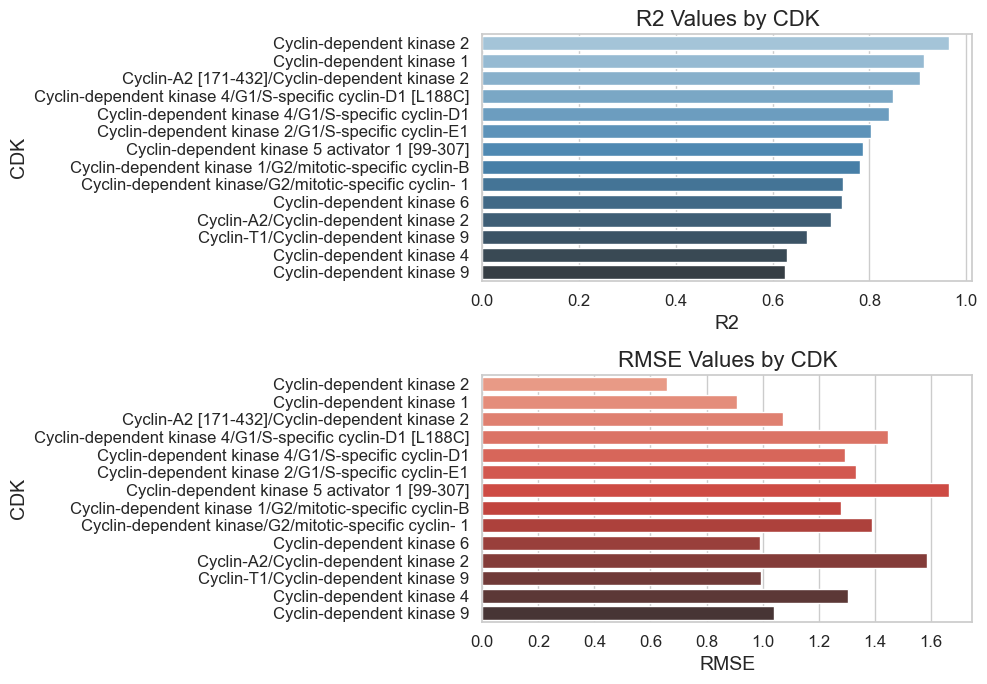

In [50]:
# Use Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot R2
sns.barplot(y="CDK", x="R2", data=df_combined, palette="Blues_d", ax=ax[0])
ax[0].set_title("R2 Values by CDK", fontsize=16)
ax[0].set_xlabel("R2", fontsize=14)
ax[0].set_ylabel("CDK", fontsize=14)
ax[0].tick_params(labelsize=12)

# Plot RMSE
sns.barplot(y="CDK", x="RMSE", data=df_combined, palette="Reds_d", ax=ax[1])
ax[1].set_title("RMSE Values by CDK", fontsize=16)
ax[1].set_xlabel("RMSE", fontsize=14)
ax[1].set_ylabel("CDK", fontsize=14)
ax[1].tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()